# 1. Setting Up

In [1]:
import rdkit
print(rdkit.__version__)

import Auto3D
print(Auto3D.__version__)
import shutil
# import openbabel
# import yaml
# import torch

2022.03.5
1.14


# 2. RDKit

## 2.1 Reading and writing molecules
RDKit can read a single molecule from a SMILES string, or a set of molecules from a file. The file format can be SDF, Mol, etc.

RDKit can write molecules into SMILES, or blocks of text with different formats. This include XYZ, SDF and Mol. 

In [2]:
from rdkit import Chem
from rdkit.Chem import rdmolfiles

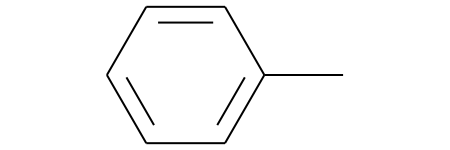

In [3]:
#Reading Molecule(s)
methel_benzene = Chem.MolFromSmiles('Cc1ccccc1')  #read from SMILES
methel_benzene

In [4]:
mols = Chem.SmilesMolSupplier("files/DA.smi", titleLine=False)
for mol in mols:
    print(mol.GetProp("_Name"), mol.GetNumAtoms())

diene 5
dieneophile 7
product 12


In [5]:
mols = Chem.SDMolSupplier("files/DA.sdf")
for mol in mols:
    print(mol.GetProp("_Name"), mol.GetNumAtoms(), mol.GetProp("E_tot"))

diene 5 -230.21657276639348
dieneophile 7 -359.70927791066526
product 12 -589.9494075911364


In [6]:
#Writing Molecules(s)
mols = Chem.SDMolSupplier("files/DA.sdf", removeHs=False)
xyz_blocks = []
for mol in mols:
    xyz_blocks.append(Chem.MolToXYZBlock(mol))
with open("files/DA.xyz", "w") as f:
    for block in xyz_blocks:
        f.write(block)

In [7]:
mols = Chem.SDMolSupplier("files/DA.sdf")
for mol in mols:
    print(Chem.MolToSmiles(mol))

c1ccoc1
O=C1C=CC(=O)N1
O=C1NC(=O)[C@H]2[C@@H]3C=C[C@@H](O3)[C@@H]12


## 2.2 Visalize molecues

RDkit can visualize an individual molecule, a list of molecules or even molecles in a dataframe.

In [8]:
from rdkit.Chem import Draw
import pandas as pd
from rdkit.Chem import PandasTools

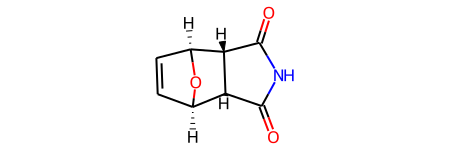

In [9]:
#Visualization Molecule(s)
mol

In [10]:
#prepare a list of molecules
df = pd.read_csv("files/20_mols.csv")
df.head()

,ID,acids,property
0,29168511,O=C(O)Cc1cc(=O)oc2cc(O)ccc12,98.0
1,36904709,C[C@@H](O)c1cccc(-c2ccc(OCC(=O)O)cc2)n1,23.0
2,29795543,CC[C@H](C(=O)N1CCCC[C@H]1C(=O)O)c1cc(OC)c(OC)c...,55.0
3,36896966,CC(C)(C)OC(=O)N1C[C@@H](NC(=O)OCC2c3ccccc3-c3c...,87.0
4,35900298,COc1cccc(S(=O)(=O)Nc2ccccc2C(=O)O)c1,67.9


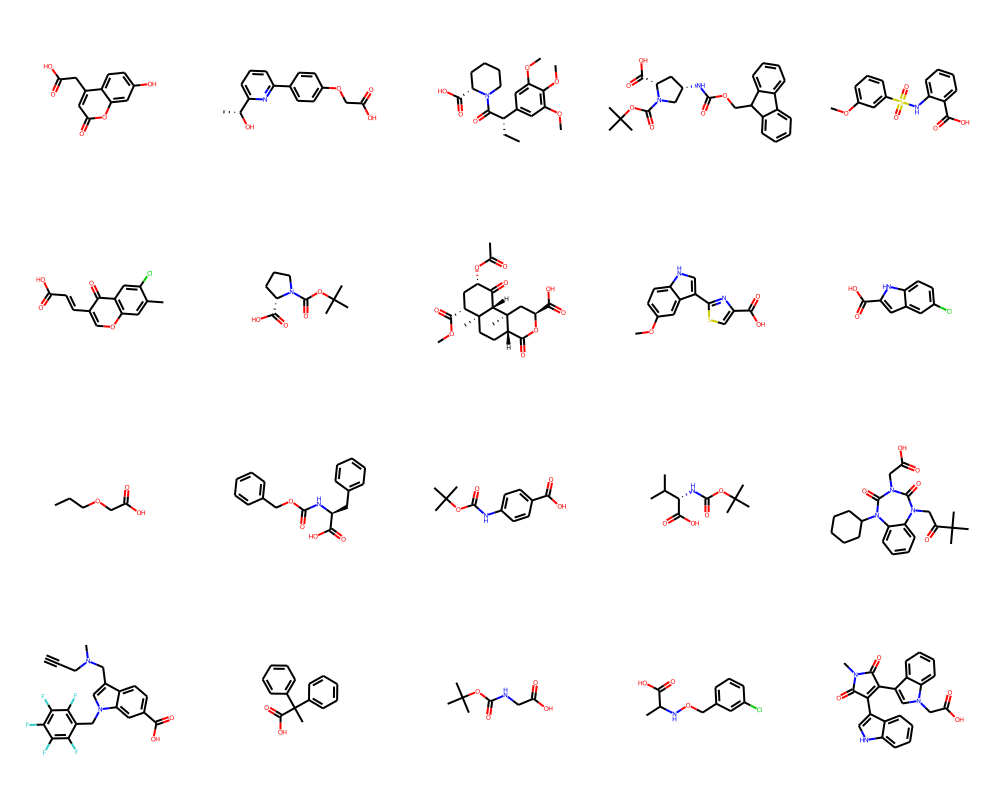

In [11]:
smiles = [smi for smi in df["acids"]]
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(mols, molsPerRow=5)

,ID,acids,property,acid_structure
0,29168511,O=C(O)Cc1cc(=O)oc2cc(O)ccc12,98.0,
1,36904709,C[C@@H](O)c1cccc(-c2ccc(OCC(=O)O)cc2)n1,23.0,
2,29795543,CC[C@H](C(=O)N1CCCC[C@H]1C(=O)O)c1cc(OC)c(OC)c...,55.0,
3,36896966,CC(C)(C)OC(=O)N1C[C@@H](NC(=O)OCC2c3ccccc3-c3c...,87.0,
4,35900298,COc1cccc(S(=O)(=O)Nc2ccccc2C(=O)O)c1,67.9,

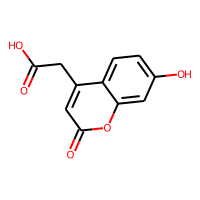
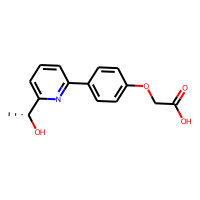
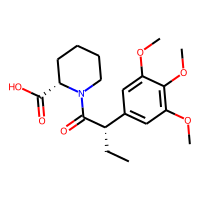
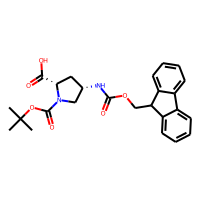
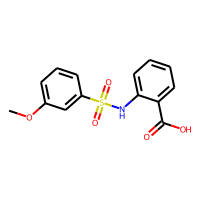

In [12]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="acids", molCol="acid_structure")
df.head()

## 2.3 Getting information from molecules
We could get basic atomic, bond-level or molecule level information from molecules.

In [13]:
#Get Molecular & Atomic information
mol  = Chem.MolFromSmiles("C[C@@H](O)c1cccc(-c2ccc(OCC(=O)O)cc2)n1")
print("# of conformers: ", mol.GetNumConformers())
print("# of atoms: ", mol.GetNumAtoms())
print("# of bonds: ", mol.GetNumBonds())
print("# of heavy atoms: ", mol.GetNumHeavyAtoms())
print("# of aromatic atoms: ", list(mol.GetAromaticAtoms()))

# of conformers:  0
# of atoms:  20
# of bonds:  21
# of heavy atoms:  20
# of aromatic atoms:  [<rdkit.Chem.rdchem.Atom object at 0x7f94eb6957c0>, <rdkit.Chem.rdchem.Atom object at 0x7f94eb6955e0>, <rdkit.Chem.rdchem.Atom object at 0x7f94eb695700>, <rdkit.Chem.rdchem.Atom object at 0x7f94eb6956a0>, <rdkit.Chem.rdchem.Atom object at 0x7f94eb695940>, <rdkit.Chem.rdchem.Atom object at 0x7f94eb695760>, <rdkit.Chem.rdchem.Atom object at 0x7f94eb695880>, <rdkit.Chem.rdchem.Atom object at 0x7f94eb695820>, <rdkit.Chem.rdchem.Atom object at 0x7f94eb695a00>, <rdkit.Chem.rdchem.Atom object at 0x7f94eb6953a0>, <rdkit.Chem.rdchem.Atom object at 0x7f94eb6950a0>, <rdkit.Chem.rdchem.Atom object at 0x7f94eb6959a0>]


In [14]:
#get atomic information
atoms = mol.GetAtoms()
for atom in atoms:
    print(atom.GetSymbol(), atom.GetAtomicNum(), atom.GetIdx(), atom.GetTotalNumHs(), atom.GetFormalCharge(), atom.GetHybridization())

C 6 0 3 0 SP3
C 6 1 1 0 SP3
O 8 2 1 0 SP3
C 6 3 0 0 SP2
C 6 4 1 0 SP2
C 6 5 1 0 SP2
C 6 6 1 0 SP2
C 6 7 0 0 SP2
C 6 8 0 0 SP2
C 6 9 1 0 SP2
C 6 10 1 0 SP2
C 6 11 0 0 SP2
O 8 12 0 0 SP2
C 6 13 2 0 SP3
C 6 14 0 0 SP2
O 8 15 0 0 SP2
O 8 16 1 0 SP2
C 6 17 1 0 SP2
C 6 18 1 0 SP2
N 7 19 0 0 SP2


In [15]:
# get bond information
bonds = mol.GetBonds()
for bond in bonds:
    print(bond.GetIdx(), bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondType(), bond.GetIsAromatic())

0 0 1 SINGLE False
1 1 2 SINGLE False
2 1 3 SINGLE False
3 3 4 AROMATIC True
4 4 5 AROMATIC True
5 5 6 AROMATIC True
6 6 7 AROMATIC True
7 7 8 SINGLE False
8 8 9 AROMATIC True
9 9 10 AROMATIC True
10 10 11 AROMATIC True
11 11 12 SINGLE False
12 12 13 SINGLE False
13 13 14 SINGLE False
14 14 15 DOUBLE False
15 14 16 SINGLE False
16 11 17 AROMATIC True
17 17 18 AROMATIC True
18 7 19 AROMATIC True
19 19 3 AROMATIC True
20 18 8 AROMATIC True


## 2.4 Getting descriptors from molecules
RDkit can give us molecular fingerprints or descriptors, which are numerical molecular representation that many downstream modeling applications rely on.

In [16]:
# Descriptors (fingerprint, similarity, other molecular properties) Phil
import numpy as np
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import AllChem

In [17]:
print("molecular weight: %.2f" % (Descriptors.MolWt(mol)) )
print("TPSA: %s" % (Descriptors.TPSA(mol)))  #topological polar surface area
print("LogP: %.2f" % (Descriptors.MolLogP(mol)))

molecular weight: 273.29
TPSA: 79.65
LogP: 2.27


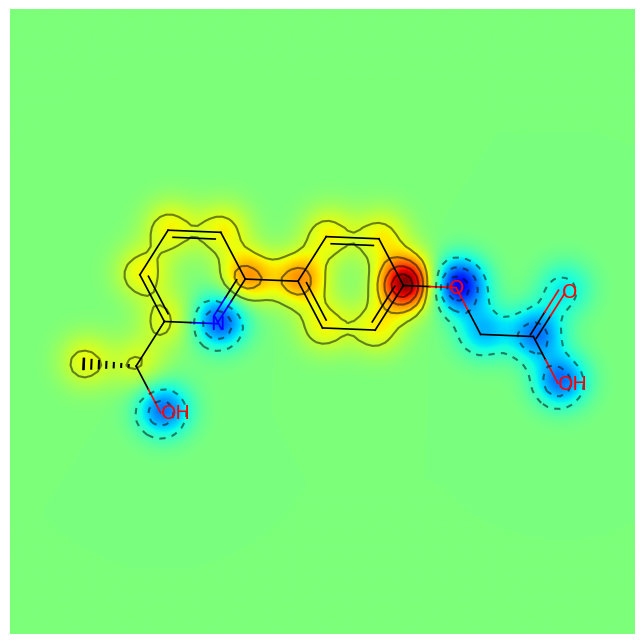

In [18]:
#visualize atomic contribution into the LogP value
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
img = SimilarityMaps.GetSimilarityMapFromWeights(mol, [x for x, y in contribs], colorMap="jet", contourLines=10)

In [19]:
# calculate all descriptors
num_descriptors = [x[0] for x in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(num_descriptors)
print(len(num_descriptors))

208


In [20]:
all_descriptors = calc.CalcDescriptors(mol)
print(all_descriptors)

(10.403651735742006, -1.0135390946502054, 10.403651735742006, 0.365963386527961, 0.8731380937098465, 273.28799999999995, 258.16799999999995, 273.10010796000006, 104, 0, 0.34122211834930904, -0.48191846244534897, 0.48191846244534897, 0.34122211834930904, 1.25, 1.95, 2.55, 16.50227082832343, 10.106390843452102, 2.055853947132005, -2.075897210420004, 2.2189284090057386, -2.086910937381524, 5.682343112188515, -0.13881013185039648, 2.1689644789313864, 593.077438063463, 14.535169427003234, 10.984046302131157, 10.984046302131157, 9.5585506480638, 6.160905643335699, 6.160905643335699, 4.330457331422051, 4.330457331422051, 2.7110603965575257, 2.7110603965575257, 1.7119105962931211, 1.7119105962931211, -2.4, 33489.4500985467, 14.018545496589201, 6.164208984375, 3.5513007817506095, 116.03144859803663, 14.94991774348146, 5.749511833283905, 6.606881964512918, 0.0, 0.0, 5.969305287951849, 4.9839785209472085, 4.794537184071822, 0.0, 0.0, 6.06636706846161, 43.321939610460284, 5.563451491696996, 17.491

In [21]:
#fingerprints
bi = {}
MFP = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bi)
print(MFP)

In [22]:
MFP.ToBitString()

'010000000000000100000000000000000100000000000000000000000000000010000000010000001000000000000000000000100000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000010000000000000000000000010000000000000010000000000000000000000000000000001000000000000000000000100000000001000000000000000000000000001000000000001000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000100000000001000000000000000001000010000000100000000000000000000000000000000000000000000010000000000000000000000000000000000100000000000000000001000100000000000001000100000000000001000000000000000000000000000001001000000000000000000000000000000000000000000000000001000000000000000000000000000000001000000000000000000

In [23]:
MFP2 = np.array(MFP)
MFP2

array([0, 1, 0, ..., 0, 0, 0])

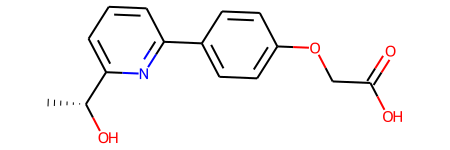

In [24]:
# meaning of the bits
mol

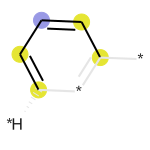

In [25]:
MFP2_svg = Draw.DrawMorganBit(mol, 15, bi, useSVG=True)
MFP2_svg

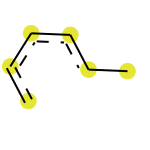

In [26]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi,fpSize=512)
rdk_svg = Draw.DrawRDKitBit(mol, 1, rdkbi, useSVG=True)
rdk_svg

## 2.5 Similarity comparasion using fingerprints

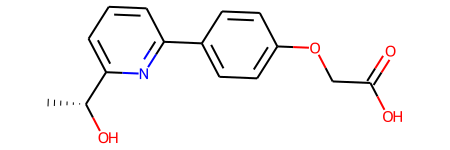

In [27]:
#similarity
mol  = Chem.MolFromSmiles("C[C@@H](O)c1cccc(-c2ccc(OCC(=O)O)cc2)n1")
MFP = np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bi))
mol

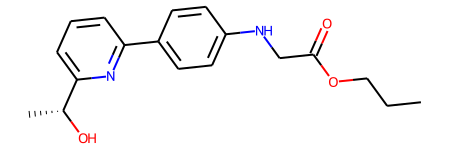

In [28]:
mol2  = Chem.MolFromSmiles("C[C@@H](O)c1cccc(-c2ccc(NCC(=O)OCCC)cc2)n1")
MFP2 = np.array(AllChem.GetMorganFingerprintAsBitVect(mol2, radius=2, nBits=1024, bitInfo=bi))
mol2

In [29]:
similarity12 = round(np.dot(MFP, MFP2)/(np.linalg.norm(MFP)*np.linalg.norm(MFP2)), 3)
print(similarity12)

0.711


## 2.6 Scafold match

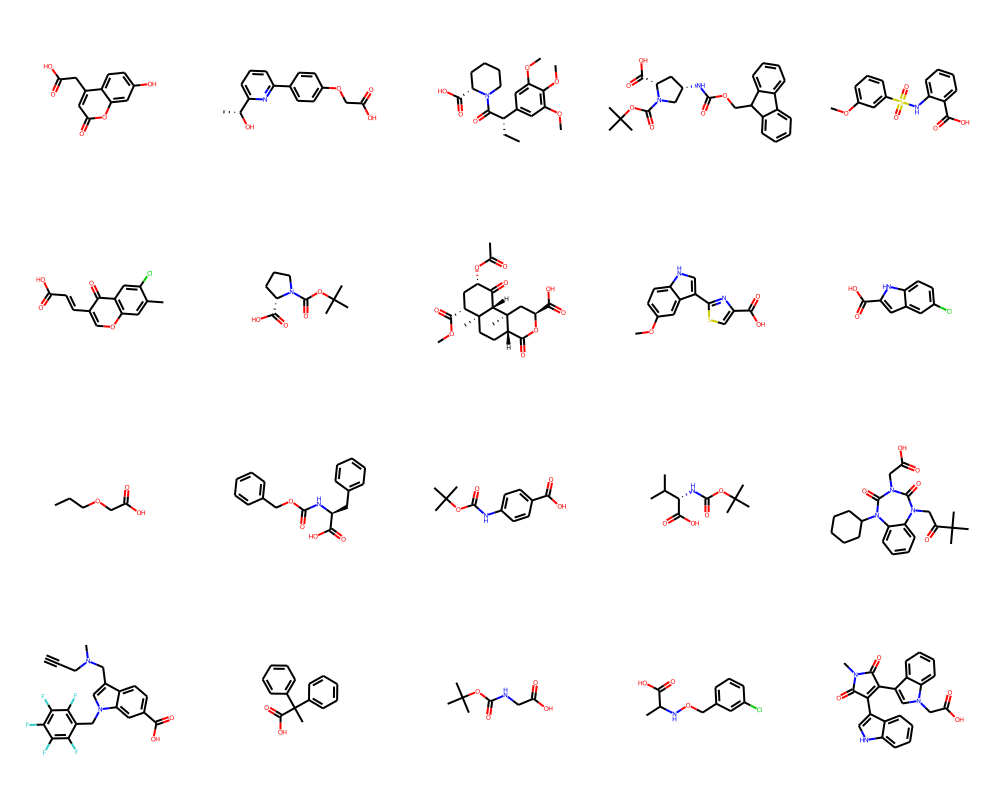

In [30]:
#substracture search
df = pd.read_csv("files/20_mols.csv")
df.head()

smiles = [smi for smi in df["acids"]]
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(mols, molsPerRow=5)

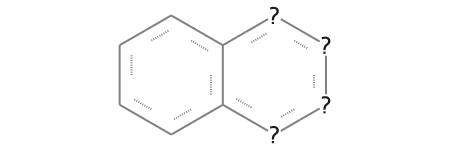

In [31]:
substract= Chem.MolFromSmarts('[*r6R1]1[cR2]2[cR1][cR1][cR1][cR1][cR2]2[*r6R1][*r6R1][*r6R1]1')
substract

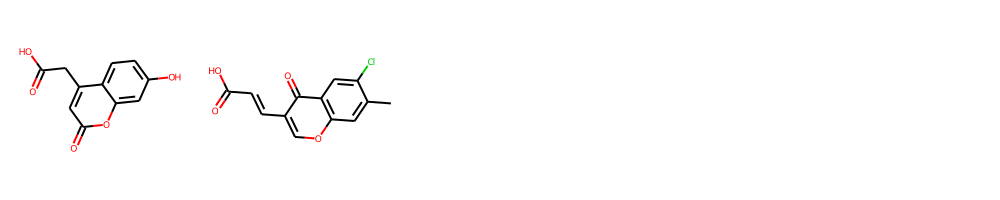

In [32]:
mols_subset = [mol for mol in mols if mol.HasSubstructMatch(substract)]
Draw.MolsToGridImage(mols_subset, molsPerRow=5)

# 3. Auto3D
[Auto3D](https://github.com/isayevlab/Auto3D_pkg) is a Python-based package for generating low-energy conformers from SMILES. It automatizes the stereoisomer enumeration and duplicate filtering process, 3D building process, fast geometry optimization and ranking process using ANI and AIMNet neural network atomistic potentials.

In [33]:
from Auto3D.auto3D import options, main

## 3.1 Generate low-energy 3D structures with Auto3D

In [34]:
if __name__ == "__main__":
    input_path = "files/DA.smi"
    args = options(input_path, k=1, use_gpu=False, verbose=True)   #args specify the parameters for Auto3D 
    out = main(args)            #main acceps the parameters and run Auto3D

Checking input file...
	There are 3 SMILES in the input file files/DA.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt and AIMNET.
The available memory is 16.0 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 3


Isomer generation for job1
Enumerating cis/tran isomers for unspecified double bonds...
Enumerating R/S isomers for unspecified atomic centers...
Removing enantiomers...
Enumerating conformers/rotamers, removing duplicates...


100%|██████████| 3/3 [00:00<00:00, 55.39it/s]




Optimizing on job1
Preparing for parallel optimizing... (Max optimization steps: 5000)
Total 3D conformers: 3


  3%|▎         | 135/5000 [00:02<01:24, 57.27it/s]


Optimization finished at step 136:   Total 3D structures: 3  Converged: 3   Dropped(Oscillating): 0    Active: 0
Beggin to slelect structures that satisfy the requirements...
Energy unit: Hartree if implicit.
Program running time: 0 minutes
Output path: /Users/liu5/Documents/ta/2022Aussies/files/20221107-170856-695018_DA/DA_out.sdf


## 3.2 Calculate thermodynamic properties with the 3D structures

In [35]:
from Auto3D.ASE.thermo import calc_thermo

In [36]:
out = "files/DA.sdf"

out_thermo = calc_thermo(out, "AIMNET", opt_tol=0.003)
print(out_thermo)  #enthalpy, entropy and Gibbs free energy are stored in the SDF file

      Step     Time          Energy         fmax
BFGS:    0 17:09:29    -6264.512081        0.0037
BFGS:    1 17:09:29    -6264.512081        0.0034
BFGS:    2 17:09:30    -6264.512084        0.0015
Enthalpy components at T = 298.00 K:
E_pot              -6264.512 eV
E_ZPE                  1.933 eV
Cv_trans (0->T)        0.039 eV
Cv_rot (0->T)          0.039 eV
Cv_vib (0->T)          0.025 eV
(C_v -> C_p)           0.026 eV
-------------------------------
H                  -6262.452 eV
Entropy components at T = 298.00 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0016737 eV/K        0.499 eV
S_rot              0.0010468 eV/K        0.312 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0001060 eV/K        0.032 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.000 eV
-------------------------------------------------
S                  0.0028253 eV/K        0.842 eV
Enthalpy components at T = 298.00 K:
E_pot             

Auto3D also provides wrapper function for single point energy calculation, geometry optimization, etc. More examples can be found in the GitHub site: https://github.com/isayevlab/Auto3D_pkg/tree/main/example

# 4. In-class Practice

In the following practice, we are going to calculate the electronic reaction energy for the following Diels-Alder reaction. The electronic reaction energy $\Delta E^{e}$ is defined as the difference between the electronic energy of the product ($E^e_{product}$) and the reactants ($E^e_{diene}$ and $E^e_{dieneophile}$):
$$\Delta E^{e} = E^e_{product} - E^e_{diene} - E^e_{dieneophile}  (1)$$
You are given a file (`files/DS.smi`) containing the SMILES for the reactants and product. To calculate the electronic reaction energy, you need to find the 3D structures and electronic energies for each of the SMILES. 

- *Hint1: Remember how we transformed SMILES into 3D structures in SDF file in section `3.1`;*
- *Hint2: Remember how we extract molecular property with RDKit in section `2`.*


![](practice.png)

**Bonus question**: can you calculate the reaction Gibbs free energy ($\Delta G$)? You already got the 3D structures and electronic energies in the first part of the practice. The reaction Gibbs free energy $\Delta G$ is defined as
$$\Delta G = G_{product} - G_{diene} - G_{dieneophile}  (2)$$
Remember that we could calculate Gibbs free energy for each molecule in section `3.2`.

# 5. Reference

- https://www.rdkit.org/docs/
- https://www.rdkit.org/docs/GettingStartedInPython.html
- https://www.rdkit.org/docs/Cookbook.html
- https://github.com/isayevlab/Auto3D_pkg
- https://github.com/isayevlab/Auto3D_pkg/tree/main/example
- https://doi.org/10.1021/acs.jcim.2c00817